# Wilshire Liu

Wilshire Liu (wl7583) and Madi Gwynn (mlg3874)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

%matplotlib inline


## <p style="text-align: center;">Project 2 - Machine Learning using Scikit and AWS</p>


This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You have to predict type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.
This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will the the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
4.  Given a percentage 'P', find the most number of 'K' your local system can handle during data loading, training and prediction. Report that 'K'. Ideally, you should test for a 'P' value of 60%. Meaning, you should have used 60% of the total data you are given. If you are given 1000 samples, you should use at least 600 samples and split that into train and test. 
5.  For each K=2,3,4,5 and percentage 'P', you should have trained a model and report the accuracy. (Refer to other tasks)
Hint: Split your data for each k=2,3,4,5 and P values and run individual models on them. 
Split the data into training and testing in the ratio of 80:20.

In [2]:
t0 = time.process_time()
crimes = pd.read_csv('crimes16-19.csv')
t1 = time.process_time()
total = t1 - t0
print("Time to run = "+str(total) +" s")

crimes.head()

Time to run = 6.3407219999999995 s


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11834500,JC440683,09/19/2019 11:55:00 PM,019XX W 79TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False,...,-87.672467,"(41.750239984, -87.672467266)",6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0
1,11837450,JC443701,09/19/2019 11:55:00 PM,035XX S RHODES AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,-87.614452,"(41.829651528, -87.614451899)",1.0,4301.0,1.0,561.0,10.0,36.0,24.0,101.0
2,11834543,JC440668,09/19/2019 11:53:00 PM,011XX W 104TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False,...,-87.650877,"(41.705024656, -87.650877274)",45.0,22212.0,72.0,595.0,22.0,13.0,9.0,253.0
3,11834471,JC440670,09/19/2019 11:50:00 PM,002XX W 63RD ST,0484,BATTERY,PRO EMP HANDS NO/MIN INJURY,CTA PLATFORM,False,False,...,-87.630937,"(41.779975054, -87.630937377)",53.0,21559.0,66.0,435.0,4.0,11.0,17.0,201.0
4,11835458,JC441818,09/19/2019 11:50:00 PM,048XX W JACKSON BLVD,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,RESIDENTIAL YARD (FRONT/BACK),False,False,...,-87.746417,"(41.876768705, -87.746417287)",11.0,22216.0,26.0,69.0,23.0,32.0,25.0,137.0


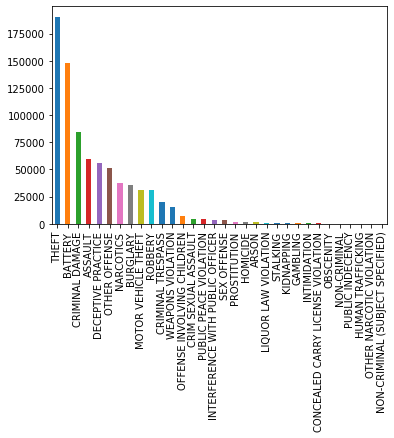

In [3]:
crimes['Primary Type'].value_counts().plot.bar()

In [4]:
crimes[['Primary Type']].groupby('Primary Type').size().sort_values(ascending=False)

Primary Type
THEFT                                190441
BATTERY                              147593
CRIMINAL DAMAGE                       84069
ASSAULT                               59459
DECEPTIVE PRACTICE                    55734
OTHER OFFENSE                         50973
NARCOTICS                             37574
BURGLARY                              35703
MOTOR VEHICLE THEFT                   31121
ROBBERY                               30718
CRIMINAL TRESPASS                     20259
WEAPONS VIOLATION                     15699
OFFENSE INVOLVING CHILDREN             6724
CRIM SEXUAL ASSAULT                    4779
PUBLIC PEACE VIOLATION                 4405
INTERFERENCE WITH PUBLIC OFFICER       3820
SEX OFFENSE                            3254
PROSTITUTION                           2110
HOMICIDE                               1865
ARSON                                  1203
LIQUOR LAW VIOLATION                    674
STALKING                                617
KIDNAPPING         

# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

In [5]:
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')

In [6]:
data = crimes.copy()
data = data[['IUCR', 'Primary Type', 'Location Description', 'Arrest', 'Domestic', 'District', 'X Coordinate', 'Y Coordinate', 'Year']]
data.dropna(inplace=True)
data.head(10)

,IUCR,Primary Type,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year
0,1310,CRIMINAL DAMAGE,RESTAURANT,False,False,6.0,1164583.0,1852271.0,2019
2,051A,ASSAULT,STREET,True,False,22.0,1170605.0,1835841.0,2019
3,0484,BATTERY,CTA PLATFORM,False,False,7.0,1175827.0,1863196.0,2019
4,5002,OTHER OFFENSE,RESIDENTIAL YARD (FRONT/BACK),False,False,15.0,1144089.0,1898231.0,2019
5,2025,NARCOTICS,PARK PROPERTY,True,False,14.0,1162740.0,1912046.0,2019
6,2890,PUBLIC PEACE VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False,15.0,1142741.0,1899553.0,2019
7,0486,BATTERY,APARTMENT,False,True,2.0,1180735.0,1879490.0,2019
8,143A,WEAPONS VIOLATION,VEHICLE NON-COMMERCIAL,True,False,15.0,1138092.0,1901628.0,2019
9,0320,ROBBERY,SIDEWALK,False,False,16.0,1139675.0,1924901.0,2019
10,1310,CRIMINAL DAMAGE,STREET,False,False,9.0,1171692.0,1876210.0,2019


In [7]:
data['IUCR'] = data['IUCR'].astype('category').cat.codes
data['Location Description'] = data['Location Description'].astype('category').cat.codes
data['Arrest'] = data['Arrest'].astype('category').cat.codes
data['Domestic'] = data['Domestic'].astype('category').cat.codes
data.head(10)

,IUCR,Primary Type,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year
0,139,CRIMINAL DAMAGE,113,0,0,6.0,1164583.0,1852271.0,2019
2,55,ASSAULT,127,1,0,22.0,1170605.0,1835841.0,2019
3,46,BATTERY,55,0,0,7.0,1175827.0,1863196.0,2019
4,316,OTHER OFFENSE,112,0,0,15.0,1144089.0,1898231.0,2019
5,238,NARCOTICS,101,1,0,14.0,1162740.0,1912046.0,2019
6,275,PUBLIC PEACE VIOLATION,103,1,0,15.0,1142741.0,1899553.0,2019
7,48,BATTERY,17,0,1,2.0,1180735.0,1879490.0,2019
8,156,WEAPONS VIOLATION,137,1,0,15.0,1138092.0,1901628.0,2019
9,18,ROBBERY,123,0,0,16.0,1139675.0,1924901.0,2019
10,139,CRIMINAL DAMAGE,127,0,0,9.0,1171692.0,1876210.0,2019


In [8]:
first = data['Primary Type'].value_counts().index[0]
second = data['Primary Type'].value_counts().index[1]
third = data['Primary Type'].value_counts().index[2]
fourth = data['Primary Type'].value_counts().index[3]
fifth = data['Primary Type'].value_counts().index[4]

In [9]:
k2data = data.copy()
k2data = k2data[(k2data['Primary Type'] == first) | (k2data['Primary Type'] == second)]
k2data.head(10)

,IUCR,Primary Type,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year
3,46,BATTERY,55,0,0,7.0,1175827.0,1863196.0,2019
7,48,BATTERY,17,0,1,2.0,1180735.0,1879490.0,2019
11,79,THEFT,111,0,0,19.0,1164882.0,1918981.0,2019
12,48,BATTERY,17,0,1,11.0,1149437.0,1899354.0,2019
13,48,BATTERY,55,0,1,5.0,1177703.0,1841947.0,2019
14,48,BATTERY,109,0,1,8.0,1160129.0,1862498.0,2019
16,48,BATTERY,109,1,0,10.0,1149474.0,1886116.0,2019
18,38,BATTERY,123,0,0,18.0,1171562.0,1915205.0,2019
21,30,BATTERY,17,0,1,5.0,1175336.0,1825995.0,2019
22,48,BATTERY,109,0,1,14.0,1163201.0,1908345.0,2019


In [10]:
print('The percentage of data with the 2 most common crimes is ' + str(len(k2data)/len(data) * 100) + '%.')

The percentage of data with the 2 most common crimes is 42.970152315503356%.


In [11]:
k3data = data.copy()
k3data = k3data[(k3data['Primary Type'] == first) | (k3data['Primary Type'] == second) | (k3data['Primary Type'] == third)]
k3data.head(10)

,IUCR,Primary Type,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year
0,139,CRIMINAL DAMAGE,113,0,0,6.0,1164583.0,1852271.0,2019
3,46,BATTERY,55,0,0,7.0,1175827.0,1863196.0,2019
7,48,BATTERY,17,0,1,2.0,1180735.0,1879490.0,2019
10,139,CRIMINAL DAMAGE,127,0,0,9.0,1171692.0,1876210.0,2019
11,79,THEFT,111,0,0,19.0,1164882.0,1918981.0,2019
12,48,BATTERY,17,0,1,11.0,1149437.0,1899354.0,2019
13,48,BATTERY,55,0,1,5.0,1177703.0,1841947.0,2019
14,48,BATTERY,109,0,1,8.0,1160129.0,1862498.0,2019
16,48,BATTERY,109,1,0,10.0,1149474.0,1886116.0,2019
17,144,CRIMINAL DAMAGE,119,0,0,11.0,1151777.0,1904421.0,2019


In [12]:
print('The percentage of data with the 3 most common crimes is ' + str(len(k3data)/len(data) * 100) + '%.')

The percentage of data with the 3 most common crimes is 53.70967741935484%.


In [13]:
k4data = data.copy()
k4data = k4data[(k4data['Primary Type'] == first) | (k4data['Primary Type'] == second) | (k4data['Primary Type'] == third) | (k4data['Primary Type'] == fourth)]
k4data.head(10)

,IUCR,Primary Type,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year
0,139,CRIMINAL DAMAGE,113,0,0,6.0,1164583.0,1852271.0,2019
2,55,ASSAULT,127,1,0,22.0,1170605.0,1835841.0,2019
3,46,BATTERY,55,0,0,7.0,1175827.0,1863196.0,2019
7,48,BATTERY,17,0,1,2.0,1180735.0,1879490.0,2019
10,139,CRIMINAL DAMAGE,127,0,0,9.0,1171692.0,1876210.0,2019
11,79,THEFT,111,0,0,19.0,1164882.0,1918981.0,2019
12,48,BATTERY,17,0,1,11.0,1149437.0,1899354.0,2019
13,48,BATTERY,55,0,1,5.0,1177703.0,1841947.0,2019
14,48,BATTERY,109,0,1,8.0,1160129.0,1862498.0,2019
16,48,BATTERY,109,1,0,10.0,1149474.0,1886116.0,2019


In [14]:
print('The percentage of data with the 4 most common crimes is ' + str(len(k4data)/len(data) * 100) + '%.')

The percentage of data with the 4 most common crimes is 61.317759885122314%.


In [15]:
k5data = data.copy()
k5data = k5data[(k4data['Primary Type'] == first) | (k5data['Primary Type'] == second) | (k5data['Primary Type'] == third) | (k5data['Primary Type'] == fourth) | (k5data['Primary Type'] == fifth)]
k5data.head(10)

,IUCR,Primary Type,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year
0,139,CRIMINAL DAMAGE,113,0,0,6.0,1164583.0,1852271.0,2019
2,55,ASSAULT,127,1,0,22.0,1170605.0,1835841.0,2019
3,46,BATTERY,55,0,0,7.0,1175827.0,1863196.0,2019
4,316,OTHER OFFENSE,112,0,0,15.0,1144089.0,1898231.0,2019
7,48,BATTERY,17,0,1,2.0,1180735.0,1879490.0,2019
10,139,CRIMINAL DAMAGE,127,0,0,9.0,1171692.0,1876210.0,2019
11,79,THEFT,111,0,0,19.0,1164882.0,1918981.0,2019
12,48,BATTERY,17,0,1,11.0,1149437.0,1899354.0,2019
13,48,BATTERY,55,0,1,5.0,1177703.0,1841947.0,2019
14,48,BATTERY,109,0,1,8.0,1160129.0,1862498.0,2019


In [16]:
print('The percentage of data with the 5 most common crimes is ' + str(len(k5data)/len(data) * 100) + '%.')

The percentage of data with the 5 most common crimes is 67.78014257141392%.


# Task 3 - Build the model

Once the features are made converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

# K = 2

In [17]:
k2labels = k2data['Primary Type']#.to_frame('Primary Type')
k2data = k2data.drop('Primary Type', axis=1)

In [18]:
#train, test
X_train, X_test, y_train, y_test = train_test_split(k2data, k2labels, test_size=0.3, random_state=0)

# decision tree
t0 = time.process_time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
t1 = time.process_time()
total = t1 - t0
print("Time to run = "+str(total) +" s")

# KNN
t0 = time.process_time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
t1 = time.process_time()
total = t1 - t0
print("Time to run = "+str(total) +" s")

Time to run = 0.656168000000001 s
Time to run = 0.8669379999999993 s


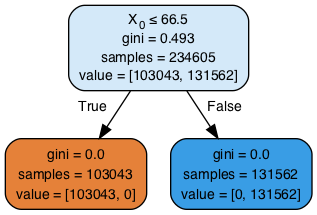

In [19]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import io

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
# decision tree test
t0 = time.process_time()
y_pred = clf.predict(X_test)
t1 = time.process_time()
total = t1 - t0
print('Misclassified samples in test set: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("Time to run = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Misclassified samples in test set: 0
Accuracy: 1.00
Time to run = 0.02388999999999797 s


Precision: 1.000
Recall: 1.000
F1: 1.000
[[44344     0]
 [    0 56201]]
              precision    recall  f1-score   support

     BATTERY       1.00      1.00      1.00     44344
       THEFT       1.00      1.00      1.00     56201

   micro avg       1.00      1.00      1.00    100545
   macro avg       1.00      1.00      1.00    100545
weighted avg       1.00      1.00      1.00    100545



In [21]:
# KNN test
t0 = time.process_time()
y_pred2 = neigh.predict(X_test)
t1 = time.process_time()
total = t1 - t0
print('Misclassified samples in test set: %d' %(y_test != y_pred2).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred2))
print("Time to run = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred2, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Misclassified samples in test set: 19705
Accuracy: 0.80
Time to run = 1.0143129999999978 s


Precision: 0.804
Recall: 0.804
F1: 0.804
[[34549  9795]
 [ 9910 46291]]
              precision    recall  f1-score   support

     BATTERY       0.78      0.78      0.78     44344
       THEFT       0.83      0.82      0.82     56201

   micro avg       0.80      0.80      0.80    100545
   macro avg       0.80      0.80      0.80    100545
weighted avg       0.80      0.80      0.80    100545



# K = 3

In [22]:
k3labels = k3data['Primary Type']#.to_frame('Primary Type')
k3data = k3data.drop('Primary Type', axis=1)

In [23]:
#train, test
X_train, X_test, y_train, y_test = train_test_split(k3data, k3labels, test_size=0.3, random_state=0)

# decision tree
t0 = time.process_time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
t1 = time.process_time()
total = t1 - t0
print("Time to run = "+str(total) +" s")

# KNN
t0 = time.process_time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
t1 = time.process_time()
total = t1 - t0
print("Time to run = "+str(total) +" s")

Time to run = 1.039716000000002 s
Time to run = 1.2555240000000012 s


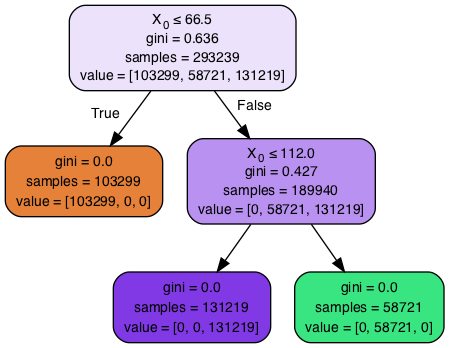

In [24]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import io

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [25]:
# decision tree test
t0 = time.process_time()
y_pred = clf.predict(X_test)
t1 = time.process_time()
total = t1 - t0
print('Misclassified samples in test set: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("Time to run = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Misclassified samples in test set: 0
Accuracy: 1.00
Time to run = 0.03765400000000341 s


Precision: 1.000
Recall: 1.000
F1: 1.000
[[44088     0     0]
 [    0 25043     0]
 [    0     0 56544]]
                 precision    recall  f1-score   support

        BATTERY       1.00      1.00      1.00     44088
CRIMINAL DAMAGE       1.00      1.00      1.00     25043
          THEFT       1.00      1.00      1.00     56544

      micro avg       1.00      1.00      1.00    125675
      macro avg       1.00      1.00      1.00    125675
   weighted avg       1.00      1.00      1.00    125675



In [26]:
# KNN test
t0 = time.process_time()
y_pred2 = neigh.predict(X_test)
t1 = time.process_time()
total = t1 - t0
print('Misclassified samples in test set: %d' %(y_test != y_pred2).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred2))
print("Time to run = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred2, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Misclassified samples in test set: 34286
Accuracy: 0.73
Time to run = 1.3419269999999983 s


Precision: 0.732
Recall: 0.727
F1: 0.723
[[34711  1203  8174]
 [ 4338 13152  7553]
 [10629  2389 43526]]
                 precision    recall  f1-score   support

        BATTERY       0.70      0.79      0.74     44088
CRIMINAL DAMAGE       0.79      0.53      0.63     25043
          THEFT       0.73      0.77      0.75     56544

      micro avg       0.73      0.73      0.73    125675
      macro avg       0.74      0.69      0.71    125675
   weighted avg       0.73      0.73      0.72    125675



# K = 4

In [27]:
k4labels = k4data['Primary Type']#.to_frame('Primary Type')
k4data = k4data.drop('Primary Type', axis=1)

In [28]:
#train, test
X_train, X_test, y_train, y_test = train_test_split(k4data, k4labels, test_size=0.3, random_state=0)

# decision tree
t0 = time.process_time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
t1 = time.process_time()
total = t1 - t0
print("Time to run = "+str(total) +" s")

# KNN
t0 = time.process_time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
t1 = time.process_time()
total = t1 - t0
print("Time to run = "+str(total) +" s")

Time to run = 1.2049959999999942 s
Time to run = 1.397344000000004 s


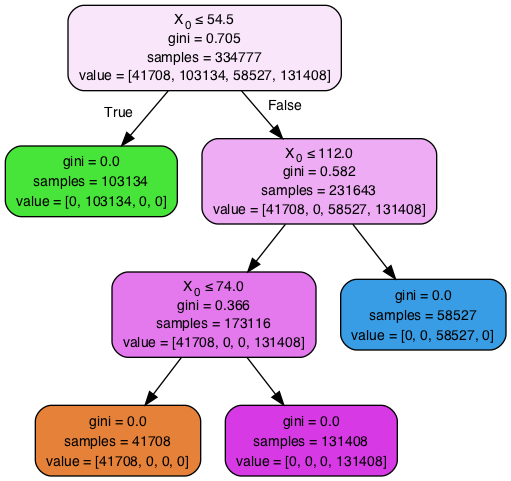

In [29]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import io

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [30]:
# decision tree test
t0 = time.process_time()
y_pred = clf.predict(X_test)
t1 = time.process_time()
total = t1 - t0
print('Misclassified samples in test set: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("Time to run = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Misclassified samples in test set: 0
Accuracy: 1.00
Time to run = 0.04609399999999653 s


Precision: 1.000
Recall: 1.000
F1: 1.000
[[17632     0     0     0]
 [    0 44253     0     0]
 [    0     0 25237     0]
 [    0     0     0 56355]]
                 precision    recall  f1-score   support

        ASSAULT       1.00      1.00      1.00     17632
        BATTERY       1.00      1.00      1.00     44253
CRIMINAL DAMAGE       1.00      1.00      1.00     25237
          THEFT       1.00      1.00      1.00     56355

      micro avg       1.00      1.00      1.00    143477
      macro avg       1.00      1.00      1.00    143477
   weighted avg       1.00      1.00      1.00    143477



In [31]:
# KNN test
t0 = time.process_time()
y_pred2 = neigh.predict(X_test)
t1 = time.process_time()
total = t1 - t0
print('Misclassified samples in test set: %d' %(y_test != y_pred2).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred2))
print("Time to run = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred2, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Misclassified samples in test set: 51478
Accuracy: 0.64
Time to run = 1.3896199999999936 s


Precision: 0.666
Recall: 0.641
F1: 0.646
[[ 7133  5326   432  4741]
 [ 6731 31031   783  5708]
 [ 3077  2679 12629  6852]
 [ 6772  6664  1713 41206]]
                 precision    recall  f1-score   support

        ASSAULT       0.30      0.40      0.35     17632
        BATTERY       0.68      0.70      0.69     44253
CRIMINAL DAMAGE       0.81      0.50      0.62     25237
          THEFT       0.70      0.73      0.72     56355

      micro avg       0.64      0.64      0.64    143477
      macro avg       0.62      0.58      0.59    143477
   weighted avg       0.67      0.64      0.65    143477



# K = 5

In [32]:
k5labels = k5data['Primary Type']#.to_frame('Primary Type')
k5data = k5data.drop('Primary Type', axis=1)

In [33]:
#train, test
X_train, X_test, y_train, y_test = train_test_split(k5data, k5labels, test_size=0.3, random_state=0)

# decision tree
t0 = time.process_time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
t1 = time.process_time()
total = t1 - t0
print("Time to run = "+str(total) +" s")

# KNN
t0 = time.process_time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
t1 = time.process_time()
total = t1 - t0
print("Time to run = "+str(total) +" s")

Time to run = 1.4641739999999999 s
Time to run = 1.9783570000000026 s


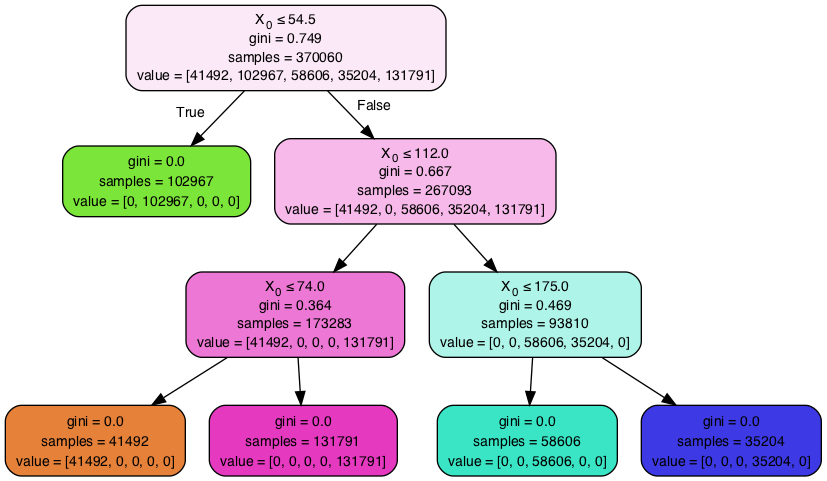

In [34]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import io

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [35]:
# decision tree test
t0 = time.process_time()
y_pred = clf.predict(X_test)
t1 = time.process_time()
total = t1 - t0
print('Misclassified samples in test set: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("Time to run = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Misclassified samples in test set: 0
Accuracy: 1.00
Time to run = 0.05421600000001092 s


Precision: 1.000
Recall: 1.000
F1: 1.000
[[17848     0     0     0     0]
 [    0 44420     0     0     0]
 [    0     0 25158     0     0]
 [    0     0     0 15200     0]
 [    0     0     0     0 55972]]
                 precision    recall  f1-score   support

        ASSAULT       1.00      1.00      1.00     17848
        BATTERY       1.00      1.00      1.00     44420
CRIMINAL DAMAGE       1.00      1.00      1.00     25158
  OTHER OFFENSE       1.00      1.00      1.00     15200
          THEFT       1.00      1.00      1.00     55972

      micro avg       1.00      1.00      1.00    158598
      macro avg       1.00      1.00      1.00    158598
   weighted avg       1.00      1.00      1.00    158598



In [36]:
# KNN test
t0 = time.process_time()
y_pred2 = neigh.predict(X_test)
t1 = time.process_time()
total = t1 - t0
print('Misclassified samples in test set: %d' %(y_test != y_pred2).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred2))
print("Time to run = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred2, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Misclassified samples in test set: 58062
Accuracy: 0.63
Time to run = 1.6505319999999983 s


Precision: 0.659
Recall: 0.634
F1: 0.640
[[ 7182  5398   433    17  4818]
 [ 6789 30914   817    53  5847]
 [ 3115  2611 12495   124  6813]
 [  613   445  3892  9112  1138]
 [ 6740  6604  1722    73 40833]]
                 precision    recall  f1-score   support

        ASSAULT       0.29      0.40      0.34     17848
        BATTERY       0.67      0.70      0.68     44420
CRIMINAL DAMAGE       0.65      0.50      0.56     25158
  OTHER OFFENSE       0.97      0.60      0.74     15200
          THEFT       0.69      0.73      0.71     55972

      micro avg       0.63      0.63      0.63    158598
      macro avg       0.65      0.58      0.61    158598
   weighted avg       0.66      0.63      0.64    158598



# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.  

Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

# AWS 

In [43]:
awst0 = time.process_time()
crimes = pd.read_csv('crimes16-19.csv')
awst1 = time.process_time()
total = awst1 - awst0
print("Time to run on AWS instance = "+str(total) +" s")

#crimes.head()

Time to run on AWS instance = 5.916722497000023 s


In [44]:
data = crimes.copy()
data = data[['IUCR', 'Primary Type', 'Location Description', 'Arrest', 'Domestic', 'District', 'X Coordinate', 'Y Coordinate', 'Year']]
data.dropna(inplace=True)
#data.head(10)

In [45]:
data['IUCR'] = data['IUCR'].astype('category').cat.codes
data['Location Description'] = data['Location Description'].astype('category').cat.codes
data['Arrest'] = data['Arrest'].astype('category').cat.codes
data['Domestic'] = data['Domestic'].astype('category').cat.codes
#data.head(10)

In [46]:
first = data['Primary Type'].value_counts().index[0]
second = data['Primary Type'].value_counts().index[1]
third = data['Primary Type'].value_counts().index[2]
fourth = data['Primary Type'].value_counts().index[3]

In [47]:
k4data = data.copy()
k4data = k4data[(k4data['Primary Type'] == first) | (k4data['Primary Type'] == second) | (k4data['Primary Type'] == third) | (k4data['Primary Type'] == fourth)]
#k4data.head(10)

# K = 4

In [48]:
k4labels = k4data['Primary Type']#.to_frame('Primary Type')
k4data = k4data.drop('Primary Type', axis=1)

In [49]:
#train, test
X_train, X_test, y_train, y_test = train_test_split(k4data, k4labels, test_size=0.3, random_state=0)

# decision tree
awst0 = time.process_time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
awst1 = time.process_time()
total = awst1 - awst0
print("Time to run on AWS instance = "+str(total) +" s")

# KNN
awst0 = time.process_time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
awst1 = time.process_time()
total = awst1 - awst0
print("Time to run on AWS instance = "+str(total) +" s")

Time to run on AWS instance = 3.499986450000023 s
Time to run on AWS instance = 3.6111780299999907 s


In [51]:
# decision tree test
awst0 = time.process_time()
y_pred = clf.predict(X_test)
awst1 = time.process_time()
total = awst1 - awst0
print('Misclassified samples in test set: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("Time to run on AWS instance = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Misclassified samples in test set: 0
Accuracy: 1.00
Time to run on AWS instance = 0.0783155000000022 s


Precision: 1.000
Recall: 1.000
F1: 1.000
[[17632     0     0     0]
 [    0 44253     0     0]
 [    0     0 25237     0]
 [    0     0     0 56355]]
                 precision    recall  f1-score   support

        ASSAULT       1.00      1.00      1.00     17632
        BATTERY       1.00      1.00      1.00     44253
CRIMINAL DAMAGE       1.00      1.00      1.00     25237
          THEFT       1.00      1.00      1.00     56355

       accuracy                           1.00    143477
      macro avg       1.00      1.00      1.00    143477
   weighted avg       1.00      1.00      1.00    143477



In [52]:
# KNN test
awst0 = time.process_time()
y_pred2 = neigh.predict(X_test)
awst1 = time.process_time()
total = awst1 - awst0
print('Misclassified samples in test set: %d' %(y_test != y_pred2).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred2))
print("Time to run on AWS instance = "+str(total) +" s")

# Precision, Recall, and F1-score
print('\n')
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred2, average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred2, average='weighted'))

# Confusion matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Misclassified samples in test set: 51478
Accuracy: 0.64
Time to run on AWS instance = 7.984657857999991 s


Precision: 0.666
Recall: 0.641
F1: 0.646
[[ 7133  5326   432  4741]
 [ 6731 31031   783  5708]
 [ 3077  2679 12629  6852]
 [ 6772  6664  1713 41206]]
                 precision    recall  f1-score   support

        ASSAULT       0.30      0.40      0.35     17632
        BATTERY       0.68      0.70      0.69     44253
CRIMINAL DAMAGE       0.81      0.50      0.62     25237
          THEFT       0.70      0.73      0.72     56355

       accuracy                           0.64    143477
      macro avg       0.62      0.58      0.59    143477
   weighted avg       0.67      0.64      0.65    143477



# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS

# Running CV 5-fold on K = 4 (number of classes is 4)

In [40]:
# decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(k4data, k4labels)

t0 = time.process_time()
scores = cross_val_score(clf, k4data, k4labels, cv=5)
t1 = time.process_time()
total = t1 - t0

print("Time to run = "+str(total) +" s")
print('Scores for each fold:', scores)
print('Overall Accuracy:', scores.mean())

Time to run = 9.708146 s
Scores for each fold: [1. 1. 1. 1. 1.]
Overall Accuracy: 1.0


In [41]:
# KNN
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(k4data, k4labels)

t0 = time.process_time()
scores = cross_val_score(neigh, k4data, k4labels, cv=5)
t1 = time.process_time()
total = t1 - t0

print("Time to run = "+str(total) +" s")
print('Scores for each fold:', scores)
print('Overall Accuracy:', scores.mean())

Time to run = 17.071071000000018 s
Scores for each fold: [0.64342617 0.64900891 0.652058   0.64434919 0.63603383]
Overall Accuracy: 0.6449752202941458


# AWS

In [54]:
# decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(k4data, k4labels)

awst0 = time.process_time()
scores = cross_val_score(clf, k4data, k4labels, cv=5)
awst1 = time.process_time()
total = awst1 - awst0

print("Time to run on AWS instance = "+str(total) +" s")
print('Scores for each fold:', scores)
print('Overall Accuracy:', scores.mean())

Time to run on AWS instance = 25.578399913 s
Scores for each fold: [1. 1. 1. 1. 1.]
Overall Accuracy: 1.0


In [55]:
# KNN
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(k4data, k4labels)

awst0 = time.process_time()
scores = cross_val_score(neigh, k4data, k4labels, cv=5)
awst1 = time.process_time()
total = awst1 - awst0

print("Time to run on AWS instance = "+str(total) +" s")
print('Scores for each fold:', scores)
print('Overall Accuracy:', scores.mean())

Time to run on AWS instance = 53.260778751999965 s
Scores for each fold: [0.64342617 0.64900891 0.652058   0.64434919 0.63603383]
Overall Accuracy: 0.6449752202941458
